In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.animation import FuncAnimation
import subprocess

import sys

def parse_mapfile(filename):
    with open(filename, 'r') as file:
        assert file.readline().strip() == 'N', "Expected 'N' in the first line"
        x_size, y_size = map(int, file.readline().strip().split(','))
        
        assert file.readline().strip() == 'C', "Expected 'C' in the third line"
        collision_threshold = int(file.readline().strip())
        
        assert file.readline().strip() == 'R', "Expected 'R' in the fifth line"
        robotX, robotY = map(int, file.readline().strip().split(','))

        assert file.readline().strip() == 'T', "Expected 'T' in the seventh line"
        target_trajectory = []
        line = file.readline().strip()
        while line != 'M':
            x, y = map(float, line.split(','))
            target_trajectory.append({'x': x, 'y': y})
            line = file.readline().strip()
        
        costmap = []
        for line in file:
            row = list(map(float, line.strip().split(',')))
            costmap.append(row)
        
        costmap = np.asarray(costmap).T
    
    return x_size, y_size, collision_threshold, robotX, robotY, target_trajectory, costmap

def parse_robot_trajectory_file(filename):
    robot_trajectory = []
    with open(filename, 'r') as file:
        for line in file:
            t, x, y = map(int, line.strip().split(','))
            robot_trajectory.append({'t': t, 'x': x, 'y': y})
    
    return robot_trajectory

SPEEDUP = 5000

# file_name = 'map3'
def plot_and_save(file_name):
    file = file_name +'.txt'
        
    x_size, y_size, collision_threshold, robotX, robotY, target_trajectory, costmap = parse_mapfile(file)
    subprocess.run(["./a.out", file])

    robot_trajectory = parse_robot_trajectory_file('robot_trajectory.txt')

    fig, ax = plt.subplots()

    ax.imshow(costmap)  # Display the costmap on the axes

    # Plot the complete robot trajectory
    ax.plot([p['x'] for p in robot_trajectory], [p['y'] for p in robot_trajectory], lw=2, marker='o', color='b', label='robot')

    # Assuming 'target_trajectory' is a list similar to 'robot_trajectory' but for the target
    # Calculate the max 't' value from robot_trajectory to plot the target trajectory up to this time
    max_t = max(p['t'] for p in robot_trajectory)
    # print([p['t'] for p in target_trajectory])
    ax.plot([p['x'] for p in target_trajectory[:max_t]], 
            [p['y'] for p in target_trajectory[:max_t]], lw=2, marker='o', color='r', label='target')

    plt.legend()
    plt.savefig(f'../report/images/{file_name}.png')
    # plt.show()


Reading problem definition from: map1.txt
map size: 1825,2332
collision threshold: 100
robot pose: 159,208
target_steps: 5345

Running planner

RESULT
target caught = 1
time taken (s) = 2869
moves made = 2868
path cost = 2869
Reading problem definition from: map2.txt
map size: 1825,2332
collision threshold: 6500
robot pose: 231,1369
target_steps: 5245

Running planner

RESULT
target caught = 1
time taken (s) = 4684
moves made = 4246
path cost = 1604568
Reading problem definition from: map3.txt
map size: 473,436
collision threshold: 100
robot pose: 119,45
target_steps: 792

Running planner

RESULT
target caught = 1
time taken (s) = 344
moves made = 344
path cost = 344
Reading problem definition from: map4.txt
map size: 473,436
collision threshold: 5000
robot pose: 459,12
target_steps: 792

Running planner

RESULT
target caught = 1
time taken (s) = 381
moves made = 340
path cost = 381
Reading problem definition from: map5.txt
map size: 200,200
collision threshold: 100
robot pose: 25,100


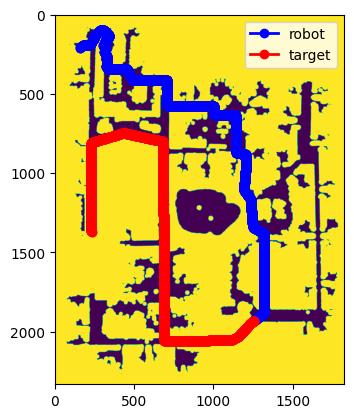

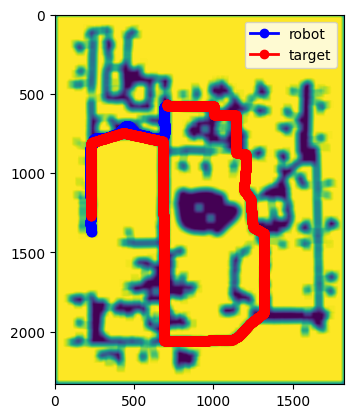

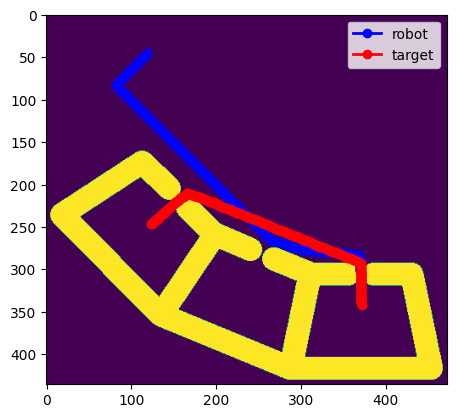

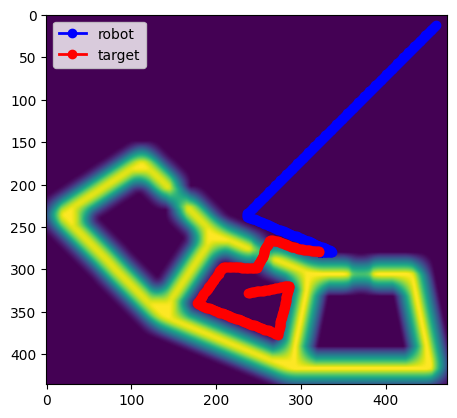

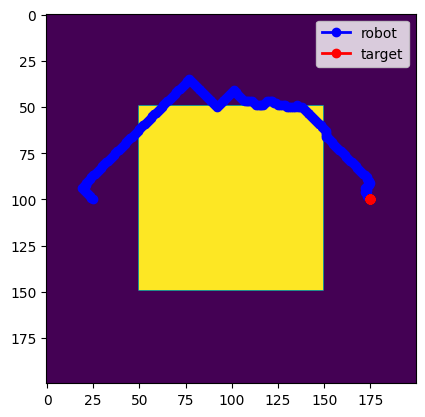

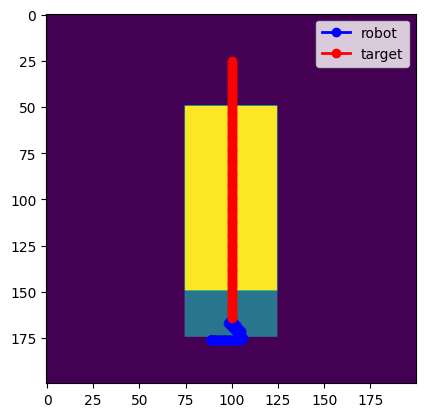

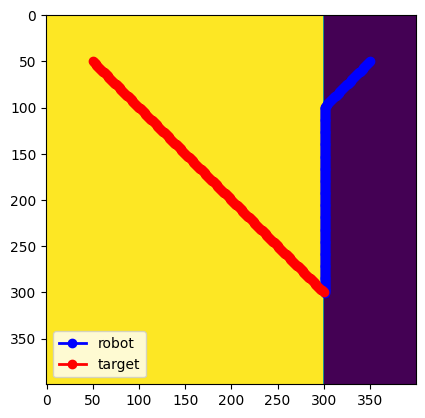

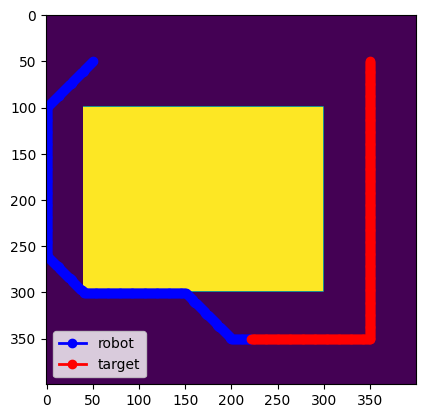

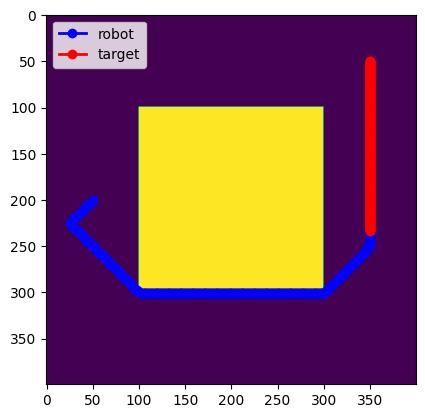

In [2]:
for i in range(1,10):
    plot_and_save(f"map{i}")